In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import zscore
from plotly.subplots import make_subplots
import warnings
from itertools import combinations
from collections import Counter
warnings.filterwarnings("ignore")


C:\Users\lenah\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lenah\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Explor the data

In [45]:
coffee_df = pd.read_csv("data/Coffee_Sales.csv")


In [3]:
coffee_df.head(5)

,التاريخ,رقم الايصال,نوع الايصال,الفئة,وحدة مخزنيةSKU,الصنف,بديل,تم تطبيق المعدلات,الكمية,اجمالي البيع,...,تكلفة البضاعة المباعة,اجمالي الربح,الضرائب,نقطة بيع,المتجر,اسمع البائع,اسم العميل,اتصال العملاء,تعليق,الحالة
0,١٢‏/٩‏/٢٠٢٤، ١١:٥٦ م,2-178859,بيع,Hot espresso drink,10000,Espresso,NaN,Without sugar,1.0,8.0,...,2.48,5.52,1.04,Ipad,BLOOMING CAFE,Mohmmed,NaN,NaN,NaN,مغلق
1,١٢‏/٩‏/٢٠٢٤، ١١:٥٥ م,2-178858,بيع,Tea,10024,Tea,NaN,With sugar,1.0,2.0,...,2.00,0.00,0.26,Ipad,BLOOMING CAFE,Mohmmed,NaN,NaN,NaN,مغلق
2,١٢‏/٩‏/٢٠٢٤، ١١:٥٢ م,2-178857,بيع,Drip coffee,10013,Coffee of the day,NaN,Iced,1.0,12.0,...,2.00,10.00,1.57,Ipad,BLOOMING CAFE,Mohmmed,NaN,NaN,NaN,مغلق
3,١٢‏/٩‏/٢٠٢٤، ١١:٥٠ م,2-178856,بيع,Drip coffee,10013,Coffee of the day,NaN,Hot,1.0,10.0,...,2.00,8.00,1.30,Ipad,BLOOMING CAFE,Mohmmed,NaN,NaN,NaN,مغلق
4,١٢‏/٩‏/٢٠٢٤، ١١:٤٥ م,2-178855,بيع,Mojito,10034,Iced tea karkadih,NaN,NaN,2.0,28.0,...,4.00,24.00,3.65,Ipad,BLOOMING CAFE,Mohmmed,NaN,NaN,NaN,مغلق


In [4]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79765 entries, 0 to 79764
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   التاريخ                79765 non-null  object 
 1   رقم الايصال            79765 non-null  object 
 2   نوع الايصال            79765 non-null  object 
 3   الفئة                  79765 non-null  object 
 4   وحدة مخزنيةSKU         79765 non-null  int64  
 5   الصنف                  79765 non-null  object 
 6   بديل                   0 non-null      float64
 7   تم تطبيق المعدلات      26371 non-null  object 
 8   الكمية                 79765 non-null  float64
 9   اجمالي البيع           79765 non-null  float64
 10  خصم                    79765 non-null  float64
 11  البيع الصافي           79765 non-null  float64
 12  تكلفة البضاعة المباعة  79765 non-null  float64
 13  اجمالي الربح           79765 non-null  float64
 14  الضرائب                79765 non-null  float64
 15  نق

In [46]:
coffee_df.drop(columns=['وحدة مخزنيةSKU', 'بديل','المتجر', 'اسمع البائع', 'اسم العميل', 'اتصال العملاء','الحالة','تعليق','نقطة بيع','نوع الايصال'], inplace=True)


In [47]:
#drop duplacate
coffee_df.drop_duplicates(inplace=True)


In [48]:
coffee_df.duplicated().sum()

0

In [49]:
# check nulls
coffee_df.isnull().sum().sort_values(ascending = False)


تم تطبيق المعدلات        53328
التاريخ                      0
رقم الايصال                  0
الفئة                        0
الصنف                        0
الكمية                       0
اجمالي البيع                 0
خصم                          0
البيع الصافي                 0
تكلفة البضاعة المباعة        0
اجمالي الربح                 0
الضرائب                      0
dtype: int64

In [50]:
coffee_df['تم تطبيق المعدلات'].fillna("NO", inplace=True)


In [8]:
# check accuracy
coffee_df.dtypes

التاريخ                   object
رقم الايصال               object
الفئة                     object
الصنف                     object
تم تطبيق المعدلات         object
الكمية                   float64
اجمالي البيع             float64
خصم                      float64
البيع الصافي             float64
تكلفة البضاعة المباعة    float64
اجمالي الربح             float64
الضرائب                  float64
dtype: object

In [11]:
coffee_df.head(2)

,التاريخ,رقم الايصال,الفئة,الصنف,تم تطبيق المعدلات,الكمية,اجمالي البيع,خصم,البيع الصافي,تكلفة البضاعة المباعة,اجمالي الربح,الضرائب
0,١٢‏/٩‏/٢٠٢٤، ١١:٥٦ م,2-178859,Hot espresso drink,Espresso,Without sugar,1.0,8.0,0.0,8.0,2.48,5.52,1.04
1,١٢‏/٩‏/٢٠٢٤، ١١:٥٥ م,2-178858,Tea,Tea,With sugar,1.0,2.0,0.0,2.0,2.00,0.00,0.26


In [51]:

from datetime import datetime

# Helper function to convert Arabic numerals to Western numerals
def convert_arabic_numerals(arabic_str):
    arabic_to_western = str.maketrans('٠١٢٣٤٥٦٧٨٩', '0123456789')
    return arabic_str.translate(arabic_to_western)

# Refine the Arabic date conversion function
def full_arabic_date_to_datetime(arabic_date):
    try:
        arabic_date = arabic_date.replace('م', 'PM').replace('ص', 'AM').replace('،', '').strip()
        arabic_date = convert_arabic_numerals(arabic_date)
        return datetime.strptime(arabic_date, '%d/%m/%Y %I:%M %p')
    except Exception as e:
        return None  

coffee_df['التاريخ'] = coffee_df['التاريخ'].astype(str)

coffee_df['التاريخ'] = coffee_df['التاريخ'].str.replace('\u200f', '', regex=True)

coffee_df['التاريخ'] = coffee_df['التاريخ'].apply(full_arabic_date_to_datetime)



In [10]:
coffee_df.head(2)

,التاريخ,رقم الايصال,الفئة,الصنف,تم تطبيق المعدلات,الكمية,اجمالي البيع,خصم,البيع الصافي,تكلفة البضاعة المباعة,اجمالي الربح,الضرائب
0,2024-09-12 23:56:00,2-178859,Hot espresso drink,Espresso,Without sugar,1.0,8.0,0.0,8.0,2.48,5.52,1.04
1,2024-09-12 23:55:00,2-178858,Tea,Tea,With sugar,1.0,2.0,0.0,2.0,2.00,0.00,0.26


In [52]:
# extract day, month , hour
coffee_df['الساعة'] = coffee_df['التاريخ'].dt.hour
months = {
    "January": "يناير", "February": "فبراير", "March": "مارس", "April": "أبريل",
    "May": "مايو", "June": "يونيو", "July": "يوليو", "August": "أغسطس",
    "September": "سبتمبر", "October": "أكتوبر", "November": "نوفمبر", "December": "ديسمبر"
}

days = {
    "Monday": "الاثنين", "Tuesday": "الثلاثاء", "Wednesday": "الأربعاء",
    "Thursday": "الخميس", "Friday": "الجمعة", "Saturday": "السبت", "Sunday": "الأحد"
}


coffee_df["الشهر"] = coffee_df["التاريخ"].dt.month_name().map(months)
coffee_df["اليوم"] = coffee_df["التاريخ"].dt.day_name().map(days)

In [53]:
coffee_df['الصنف_adjusted'] = coffee_df.apply(
    lambda row: f"{row['الصنف']} ({row['تم تطبيق المعدلات']})" if ('v60' in row['الصنف'].lower() or 'coffee of the day' in row['الصنف'].lower()) and row['تم تطبيق المعدلات'] != 'NO' else row['الصنف'], 
    axis=1
)

In [54]:

coffee_df['الصنف_adjusted'] = coffee_df['الصنف_adjusted'].str.replace(
    r'v60 \(.*?coffee beans, iced\)', 'v60 (iced)', regex=True
)
coffee_df['الصنف_adjusted'] = coffee_df['الصنف_adjusted'].str.replace(
    r'v60 \(.*?coffee beans, hot\)', 'v60 (hot)', regex=True
)
coffee_df['الصنف_adjusted'] = coffee_df['الصنف_adjusted'].str.replace(
    r'v60 \(.*?coffee beans, hot, iced\)', 'v60 (hot, iced)', regex=True
)

coffee_df['الصنف_adjusted'] = coffee_df['الصنف_adjusted'].str.replace(
    r'v60 \(.*?coffee beans\)', 'v60', regex=True
)
coffee_df = coffee_df[
    coffee_df['الصنف_adjusted'].str.strip().str.lower() != 'water'
]

In [55]:
coffee_df[coffee_df['الصنف']=='V60']['الصنف_adjusted'].value_counts()


الصنف_adjusted
V60 (Iced, Colombian coffee beans)                                 2032
V60 (Iced, Ethiopian coffee beans)                                 1990
V60 (Colombian coffee beans, ICED)                                 1924
V60 (Ethiopian coffee beans, ICED)                                 1790
V60 (Iced)                                                          550
V60 (Colombian coffee beans, HOT)                                   330
V60 (Ethiopian coffee beans, HOT)                                   320
V60                                                                 228
V60 (Ethiopian coffee beans, Hot)                                   217
V60 (Colombian coffee beans, Hot)                                   215
V60 (ICED)                                                          193
V60 (Colombian coffee beans)                                        167
V60 (Ethiopian coffee beans)                                        144
V60 (Brazilian coffee beans, ICED)               

In [56]:
# drop water item  bc it irrelevent to our analysis
coffee_df.drop(coffee_df[coffee_df['الصنف'] == 'water'].index , inplace=True)

In [57]:
coffee_df[coffee_df['الصنف'] == 'water']

,التاريخ,رقم الايصال,الفئة,الصنف,تم تطبيق المعدلات,الكمية,اجمالي البيع,خصم,البيع الصافي,تكلفة البضاعة المباعة,اجمالي الربح,الضرائب,الساعة,الشهر,اليوم,الصنف_adjusted


In [58]:
coffee_df[coffee_df['الفئة'] == 'More']['الصنف_adjusted'].value_counts()

الصنف_adjusted
Espresso shot    128
Syrup            102
Sauce              9
Name: count, dtype: int64

##  Finding paris or combos


In [18]:
# function to get most common pairs
def find_most_common_item_pairs(dataframe, column_item, column_receipt):
    
    
    # Group items by receipt number
    grouped_items = dataframe.groupby(column_receipt)[column_item].apply(list)
    
    # Generate pairs of items from each receipt
    pairs = []
    for items in grouped_items:
        if len(items) > 1:  # Consider only receipts with multiple items
            pairs.extend(combinations(sorted(items), 2))  # Generate all pairs (sorted to avoid duplicates)
    
    # Count occurrences of each pair
    pair_counts = Counter(pairs)
    
    most_common_pairs = pair_counts.most_common(10)
    
    # Format pairs for display
    formatted_pairs = [(' & '.join(pair), count) for pair, count in most_common_pairs]
    
    return formatted_pairs

### Visualization

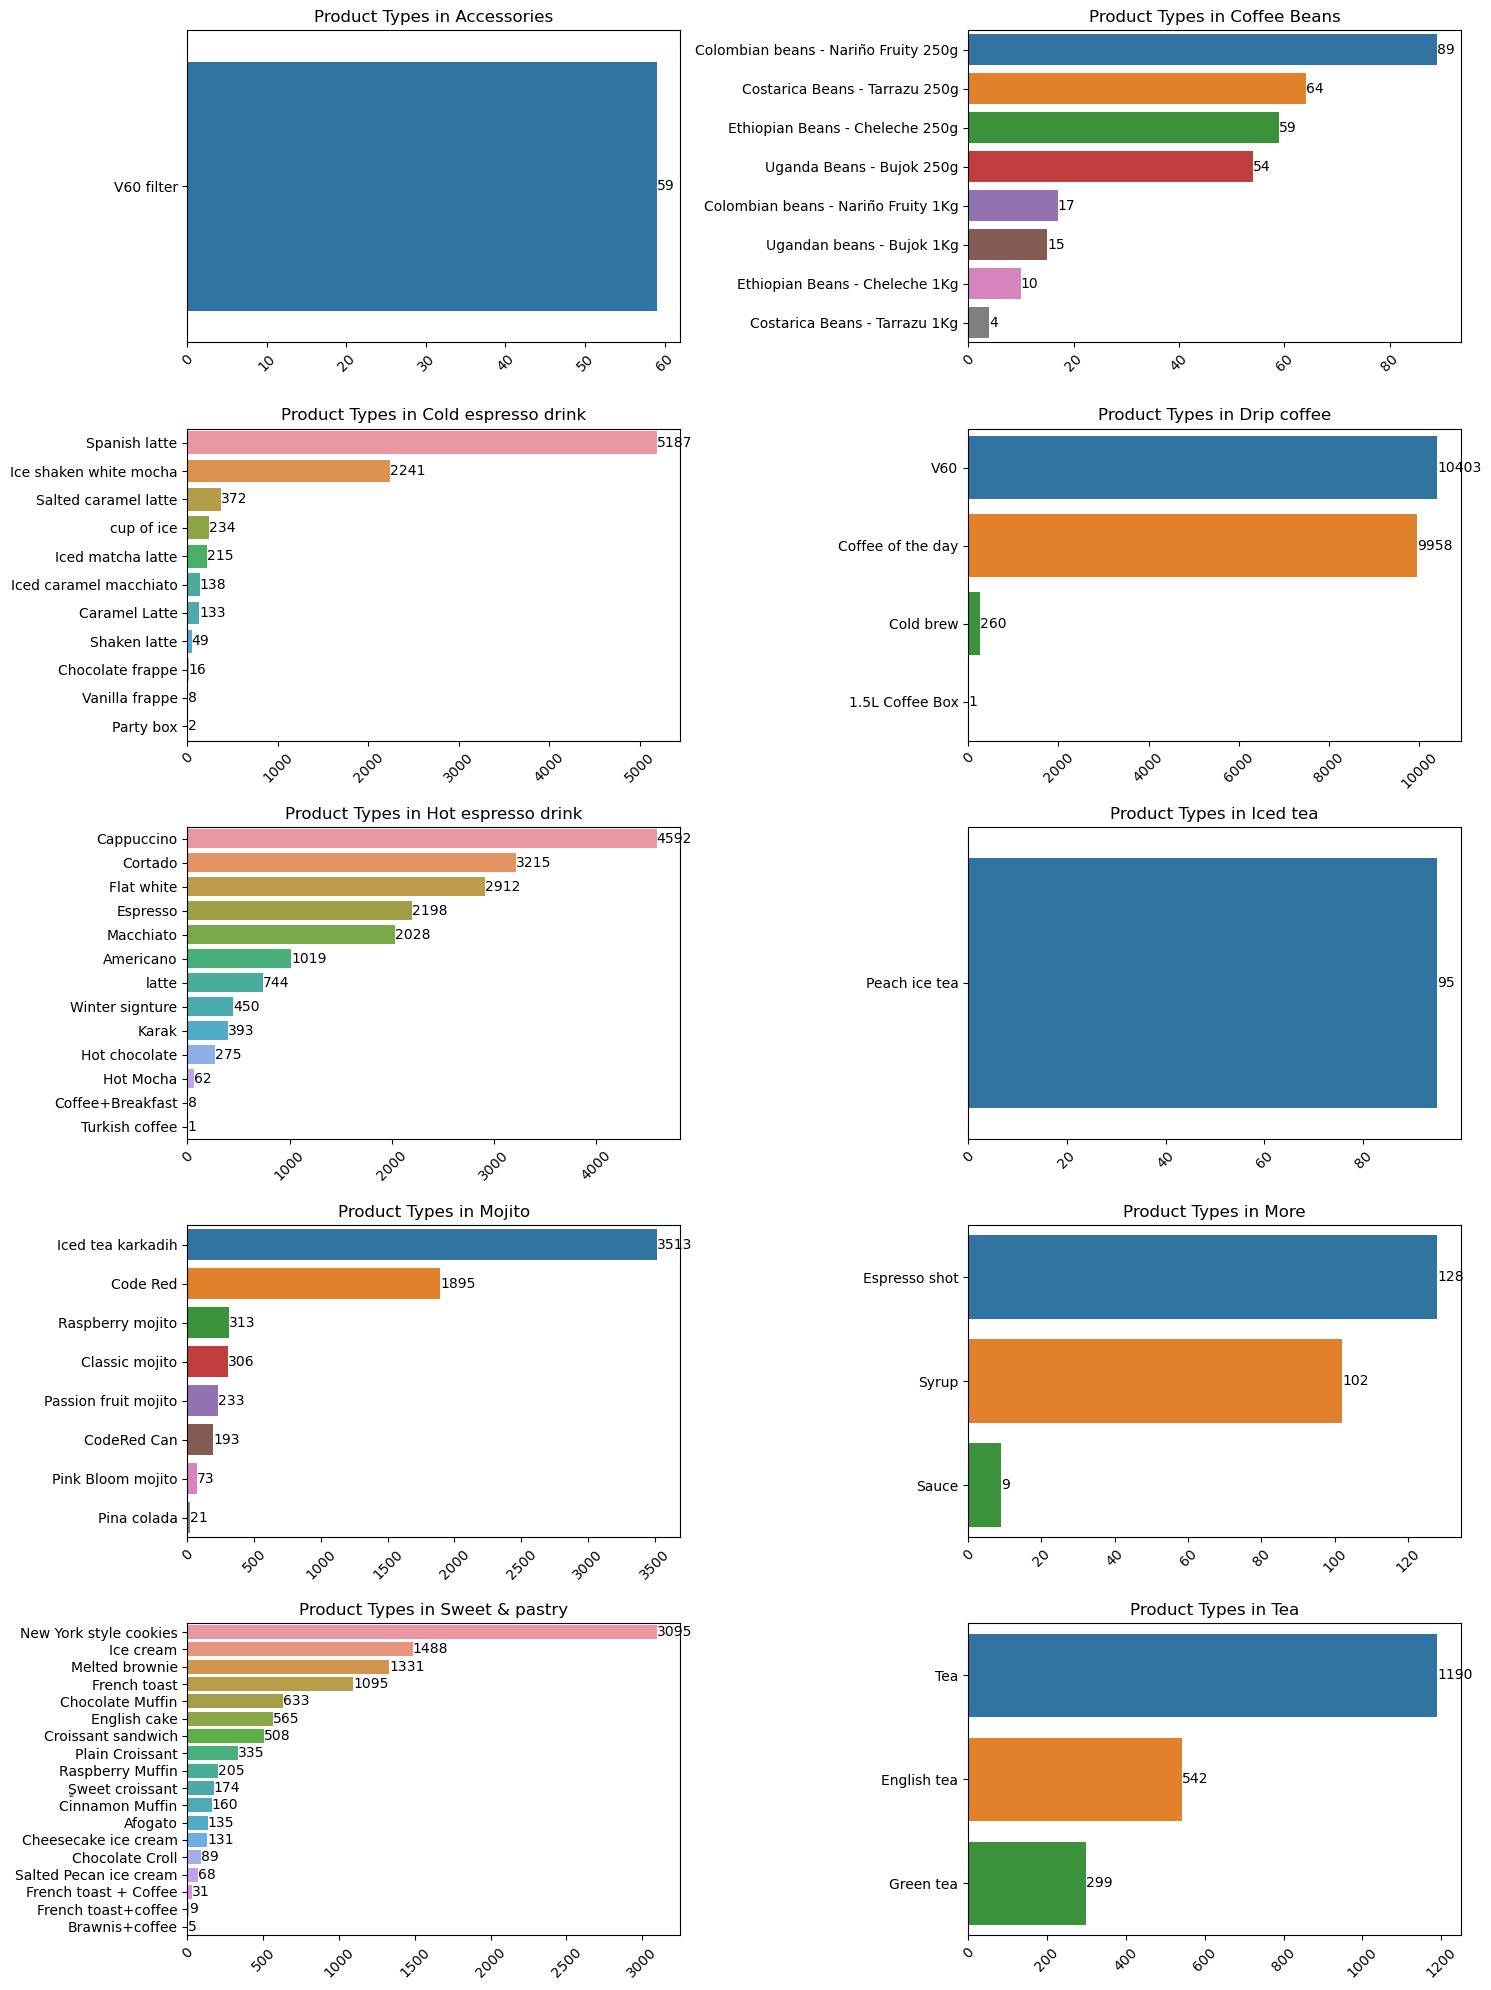

In [59]:
#getting to know our sales

# Visual Info about each category
counts = coffee_df.groupby(["الفئة", "الصنف"]).size().reset_index(name = "عدد الطلبات")

# Get unique categories
categories = counts['الفئة'].unique()

fig, axes = plt.subplots(5, 2, figsize = (15, 20))

axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['الفئة'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('عدد الطلبات', ascending = False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'عدد الطلبات', y = 'الصنف', data = subset, ax = axes[i], order = subset['الصنف'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(False)
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['عدد الطلبات'], ha = 'left', va = 'center')

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [20]:
# finding insigt about Ramadan sales
start = '2024-03-11'
end = '2024-04-10'
ramadan_df = coffee_df[(coffee_df['التاريخ'] >= start) & (coffee_df['التاريخ'] <= end)]
# filter based on periods 
after_fator = ramadan_df[(ramadan_df['الساعة'] ==  19) | (ramadan_df['الساعة'] == 20)]
after_fator_coffee = after_fator[after_fator['الفئة'].isin(['Drip coffee', 'Hot espresso drink', 'Cold espresso drink'])]
after_tra = ramadan_df[(ramadan_df['الساعة'] ==  22 ) | (ramadan_df['الساعة'] == 23) | (ramadan_df['الساعة'] == 0)]
after_tra_coffee = after_tra[after_tra['الفئة'].isin(['Drip coffee', 'Hot espresso drink', 'Cold espresso drink'])]

after_tra_coffee['الفترة'] = "بعد التراويح"
after_fator_coffee['الفترة'] = "بعد الفطور"

In [21]:
print(" بعد التراويح")
after_tra_coffee['الفئة'].value_counts()

 بعد التراويح


الفئة
Drip coffee            925
Hot espresso drink     761
Cold espresso drink    368
Name: count, dtype: int64

In [22]:
print("بعد الفطور")
after_fator_coffee['الفئة'].value_counts()

بعد الفطور


الفئة
Hot espresso drink     419
Drip coffee            382
Cold espresso drink    147
Name: count, dtype: int64

In [23]:
ramadan_temp = pd.concat([after_fator_coffee , after_tra_coffee], axis=0, ignore_index=True)

In [24]:
custom_colors = ['#faf0ef', '#cc8589', '#849a90', '#c0c7c1', '#f8d5d5']


In [48]:
period_counts = ramadan_temp['الفترة'].value_counts().reset_index()
period_counts.columns = ['الفترة' , 'عدد الطلبات']

fig = px.bar(
    period_counts, x='عدد الطلبات' , y='الفترة' , orientation='h' ,    color_discrete_sequence = ['#849a90']

)
fig

In [25]:
# finding insigts about summer 

start = '2024-06-20'
end = '2024-09-22'
summar_df = coffee_df[(coffee_df['التاريخ'] >= start) & (coffee_df['التاريخ'] <= end)]

In [26]:
fig = px.histogram(
    summar_df, 
    x='الصنف', 
    title='الصنف x الصيف',
    nbins=100  ,
    color_discrete_sequence=['#849a90']
)
fig.show()

In [27]:
icecream_df = summar_df[(summar_df['الفئة'] == 'Sweet & pastry') & (summar_df['الصنف'].isin(['Ice cream', 'Afogato', 'Cheesecake ice cream', 'Salted Pecan ice cream']))]


In [28]:
icecream_sales_by_hour = icecream_df.groupby('الساعة').size().reset_index(name='sales_count')

fig = px.line(
    icecream_sales_by_hour, 
    x='الساعة', 
    y='sales_count', 
    title='Ice Cream Sales by Hour',
    labels={'hour': 'Hour of the Day', 'sales_count': 'Number of Ice Cream Sales'},
    markers=True,
   color_discrete_sequence=['#849a90' ]

)

# Show the plot
fig.show()

In [29]:
# winter insigts
start = '2023-12-1'
end = '2024-02-15'
winter_df = coffee_df[(coffee_df['التاريخ'] >= start) & (coffee_df['التاريخ'] <= end)]

In [30]:
winter_drinks = winter_df[(winter_df['الفئة'] == 'Hot espresso drink') & (winter_df['الصنف'].isin(['Winter signture', 'Hot chocolate', 'Karak']))]


In [31]:
winter_drinks['الصنف'].value_counts()

الصنف
Winter signture    308
Karak              238
Hot chocolate      131
Name: count, dtype: int64

In [32]:
# weekend insigts
weekend = coffee_df[(
 (coffee_df['اليوم'] == 'الجمعة') | 
    (coffee_df['اليوم'] == 'السبت') | 
    ((coffee_df['اليوم'] == 'الخميس') & (coffee_df['الساعة'] >= 15)) )]

In [33]:
period_counts = weekend['اليوم'].value_counts().reset_index()
period_counts.columns = ['اليوم' , 'عدد الطلبات']

fig = px.bar(
    period_counts, x='عدد الطلبات' , y='اليوم' , orientation='h' ,    color_discrete_sequence = ['#849a90']

)
fig

In [34]:
fig = px.pie(
    coffee_df,
    names=coffee_df.apply(
        lambda row: 'Weekend' if (row['اليوم'] in ['الجمعة', 'السبت']) or 
                                  (row['اليوم'] == 'الخميس' and row['الساعة'] >= 15 ) 
                    else 'Weekday',
        axis=1
    ),
    title='Weekday vs Weekend',
    color_discrete_sequence=['#cc8589', '#849a90']
)

fig.show()

In [35]:
# bestseeling product
categor_df = coffee_df[coffee_df['الفئة'].isin(['Drip coffee','Hot espresso drink', 'Cold espresso drink', 'Tea','Iced tea', 'Mojito'])]
categor_df['الفئة'].value_counts()

الفئة
Drip coffee            20622
Hot espresso drink     17897
Cold espresso drink     8595
Mojito                  6547
Tea                     2031
Iced tea                  95
Name: count, dtype: int64

In [36]:
category_counts = categor_df['الفئة'].value_counts().reset_index()
category_counts.columns = ['الفئة' , 'عدد الطلبات']

fig = px.bar(
    category_counts, x='عدد الطلبات' , y='الفئة' , orientation='h' ,    color_discrete_sequence = ['#849a90']

)
fig

In [37]:
# Tea insigts
coffee_df.loc[coffee_df['الصنف'] == 'Karak', 'الفئة'] = 'Tea'

In [38]:
# Filter for Tea category
tea_data = coffee_df[coffee_df["الفئة"] == "Tea"]


# Count the number of orders for each item
counts = tea_data.groupby("الصنف").size().reset_index(name="Order Count")
custom_colors = ['#faf0ef', '#cc8589', '#849a90', '#c0c7c1']
fig = px.pie(
    counts, 
    values="Order Count",  
    names="الصنف",       
    title="Tea and Karak Orders Distribution", 
    color_discrete_sequence=custom_colors  
)

fig.show()

In [39]:
tea_sales_by_hour = tea_data.groupby('الساعة').size().reset_index(name='sales_count')

fig = px.line(
    tea_sales_by_hour, 
    x='الساعة', 
    y='sales_count', 
    title='أوقات الذروة للشاي',
    labels={'hour': 'Hour of the Day', 'sales_count': 'عدد المبيعات'},
    markers=True,
   color_discrete_sequence=['#849a90' ]

)

# Show the plot
fig.show()

In [40]:
# between coffee beans
# Filter for  category
bean_data = coffee_df[coffee_df["الفئة"] == "Coffee Beans"]
bean_data['الصنف'] = bean_data['الصنف'].str.replace(r'\s*-\s*\w+\s*\d+(g|Kg)', '', regex=True)
bean_data['الصنف'] = bean_data['الصنف'].str.replace(r'\s*-\s*.*', '', regex=True)

In [41]:
bean_data['الصنف'].value_counts()

الصنف
Colombian beans    106
Ethiopian Beans     69
Costarica Beans     68
Uganda Beans        54
Ugandan beans       15
Name: count, dtype: int64

In [42]:
fig = px.pie(
    bean_data, 
    names="الصنف",       
    title="بين انواع حبوب القهوة المختصة",
    color_discrete_sequence=custom_colors  
)
fig.show()

In [ ]:

coffee_based_data = coffee_df.copy()
coffee_based_data['الفئة_temp'] = coffee_based_data['الفئة'].replace(
    ['Hot espresso drink', 'Drip coffee', 'Cold espresso drink'],
    'Coffee-Based'
)

# Filter data for Coffee-Based products
coffee_based_filtered = coffee_based_data[coffee_based_data['الفئة_temp'] == 'Coffee-Based']

coffee_product_sales = coffee_based_filtered.groupby('الصنف').size().reset_index(name='count')

coffee_product_sales = coffee_product_sales.sort_values(by='count', ascending=False)

# Find the highest-selling product
highest_selling_product = coffee_product_sales.iloc[0]


fig = px.bar(
    coffee_product_sales,
    x='الصنف',
    y='count',
    title='Sales of Coffee-Based Products (Sorted)',
    labels={'الصنف': 'Product', 'count': 'Sales Count'},
    template='plotly_white',
    text='count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(categoryorder='total descending'),
    width=900,
    height=600
)


fig.show()


In [ ]:

product_type_sales = coffee_df.groupby('الصنف_adjusted').size().reset_index(name='sales_count')

product_type_sales = product_type_sales.sort_values(by='sales_count', ascending=False)

top_5_product_types = product_type_sales.head(5)

# Create a bar chart
fig = px.bar(
    top_5_product_types,
    x='الصنف_adjusted',
    y='sales_count',
    title='المشروبات الأفضل مبيعا',
    labels={'الصنف_adjusted': 'الصنف ', 'sales_count': 'عدد المبيعات'},
    template='plotly_white',
    text='sales_count'  ,
    color_discrete_sequence=['#cc8589']

    
    
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(title='الصنف', tickangle=45),  
    yaxis=dict(title='عدد الطلبات'),
    width=800,
    height=500
)

fig.show()
